# 5. Simple Visualizations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tidy_df.csv')

## 5.1 

Produce a histogram of shot types over all teams in a season of your choosing. Overlay the number of goals overtop the number of shots. What appears to be the most dangerous type of shot? The most common type of shot? Add this figure and discussion to your blog post.

A: most common: wrist shot. most dangerous: can't really tell from the graph, would have to rescale it. looking at the data it appears to be tip-ins

<ipython-input-2-eae59d342da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20202021['shot_count'] = 1


<AxesSubplot:xlabel='shot_type'>

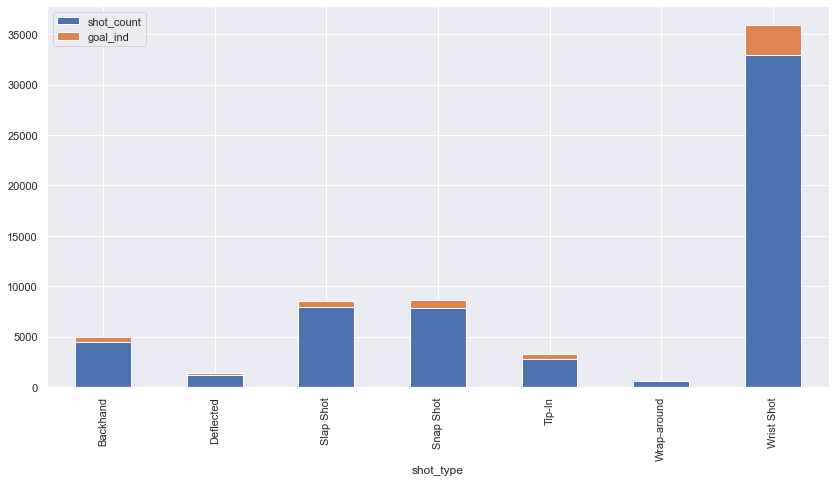

In [2]:
df_20202021 = df[(df['season'] == 20202021) & (~df['shot_type'].isnull())]
df_20202021['shot_count'] = 1
df_20202021 = df_20202021[['shot_type','shot_count', 'goal_ind']].groupby('shot_type').sum().reset_index()
sns.set_theme()
df_20202021.set_index('shot_type').plot(kind='bar', stacked=True, figsize=(14,7))

In [3]:
df_20202021['shot_pct'] = df_20202021['goal_ind'] / df_20202021['shot_count']
df_20202021

,shot_type,shot_count,goal_ind,shot_pct
0,Backhand,4453,538,0.120817
1,Deflected,1168,182,0.155822
2,Slap Shot,7982,560,0.070158
3,Snap Shot,7800,812,0.104103
4,Tip-In,2797,504,0.180193
5,Wrap-around,559,38,0.067979
6,Wrist Shot,32971,2998,0.090928


## 5.2

What is the relationship between the distance a shot was taken and the chance it was a goal? Produce a figure for each season between 2018-19 to 2020-21 to answer this, and add it to your blog post along with a couple of sentences describing your figure. Has there been much change over the past three seasons? Note: there are multiple ways to show this relationship! If your figure tells the correct story, you will get full marks

A: TODO: explain pattern in graphs below

<ipython-input-4-4011aa71e343>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-4011aa71e343>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-4-4011aa71e343>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


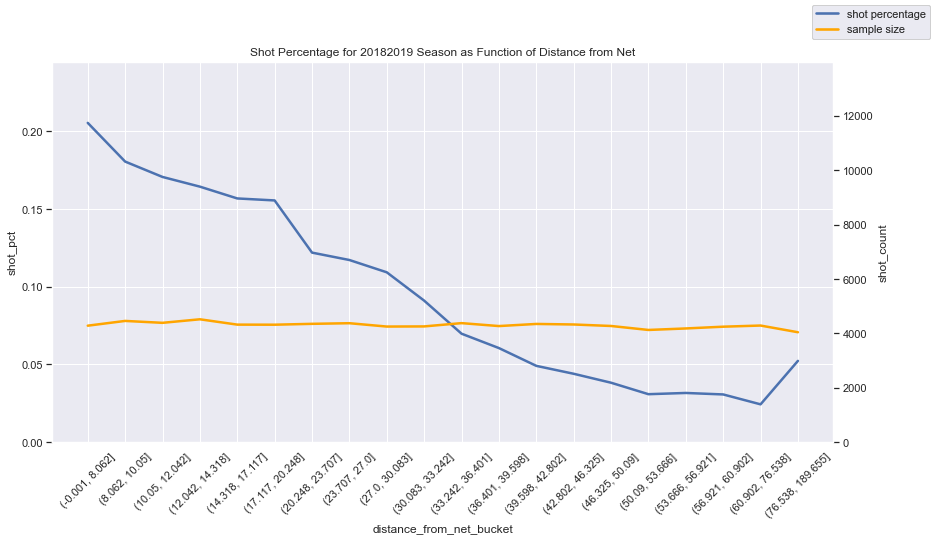

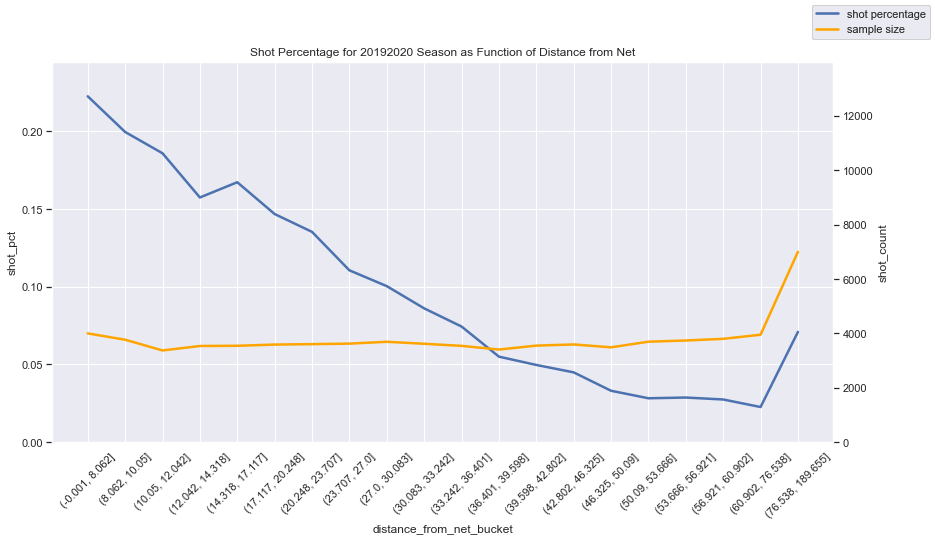

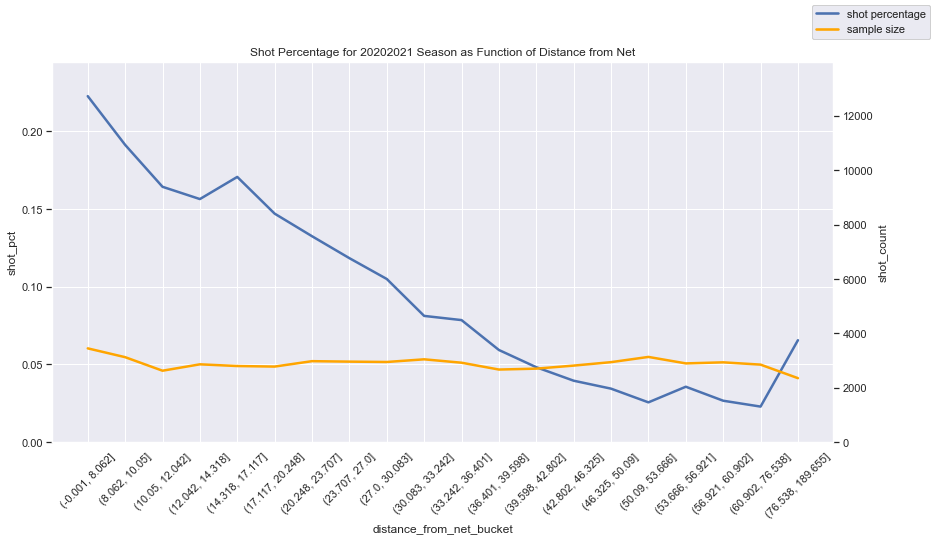

In [4]:
n_buckets = 20

df = df[~df['distance_from_net'].isnull()] # distance was null for 17 rows
df['distance_from_net_bucket'] = pd.qcut(df['distance_from_net'], n_buckets, labels = False) +1
intervals = list(set(pd.qcut(df['distance_from_net'], n_buckets)))
intervals.sort()
intervals = [str(interval) for interval in intervals]

df_copy = df.copy()
df_copy['shot_count'] = 1
df_copy = df_copy[['season','distance_from_net_bucket','shot_count','goal_ind']].groupby(['season','distance_from_net_bucket']).sum().reset_index()
df_copy['shot_pct'] = df_copy['goal_ind']/df_copy['shot_count']

y1_max = max(df_copy['shot_pct'])
y2_max = max(df_copy['shot_count'])

for season in [20182019, 20192020, 20202021]:

    df_season = df_copy[df_copy['season'] == season]
    fig = plt.figure(figsize = (14,7))
    ax = sns.lineplot(x = 'distance_from_net_bucket', y = 'shot_pct', label='shot percentage', data = df_season, color='b', legend = False, linewidth = 2.5)
    ax.set_xticks(range(1,n_buckets+1))
    ax.set_xticklabels(intervals, rotation = 45)
    ax.set_ylim(bottom=0, top=y1_max * 1.1)
    ax2 = plt.twinx()
    ax2 = sns.lineplot(x = 'distance_from_net_bucket', y = 'shot_count', label='sample size', data = df_season, color='orange', legend = False, linewidth = 2.5)
    ax2.grid(False)
    ax2.set_ylim(bottom=0, top=y2_max * 2)
    fig.legend(loc="upper right")
    plt.title(f"Shot Percentage for {season} Season as Function of Distance from Net")
    fig.legend(loc="upper right")
    fig.show()

## 5.3 

Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?

A: TODO Analyse graph below and discuss

<ipython-input-7-ac9b372033a0>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


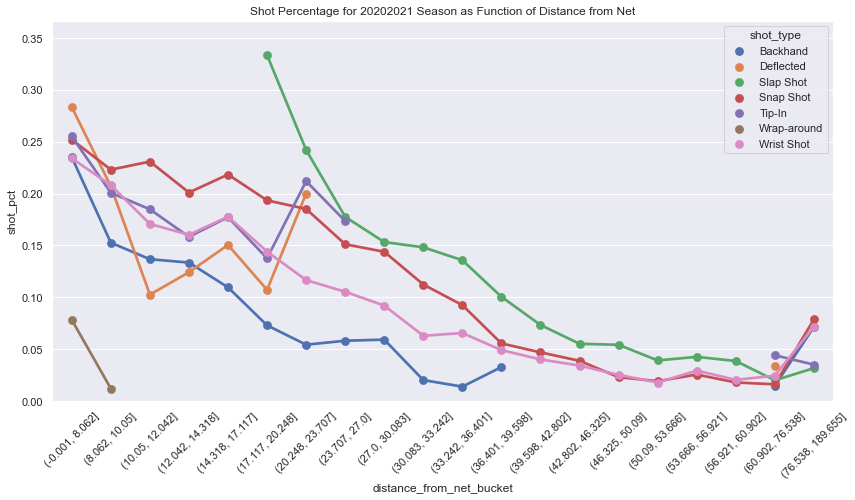

In [7]:
season = 20202021
min_sample_size = 50

df_copy = df.copy()
df_copy = df_copy[df_copy['season'] == season]
df_copy['shot_count'] = 1
df_copy = df_copy[['shot_type','distance_from_net_bucket','shot_count','goal_ind']].groupby(['shot_type','distance_from_net_bucket']).sum().reset_index()
df_copy = df_copy[df_copy['shot_count'] > min_sample_size]
df_copy['shot_pct'] = df_copy['goal_ind']/df_copy['shot_count']


y1_max = max(df_copy['shot_pct'])

fig = plt.figure(figsize = (14,7))
ax = sns.pointplot(x="distance_from_net_bucket", y="shot_pct", hue="shot_type", data=df_copy, marker="o")
plt.title(f"Shot Percentage for {season} Season as Function of Distance from Net")
ax.set_xticklabels(intervals, rotation = 45)
ax.set_ylim(bottom=0, top=y1_max * 1.1)
fig.show()